#This notebook is for ingesting and reformatting data from the RAPID Stream Flow model and outputting it for use in WaterTrek#

Code by Sean RG Barberie (SRBarberie@Alaska.edu) for NASA JPL during a summer internship.

August, 2015


In [9]:
import geopandas as gpd
%matplotlib inline
import pandas as pd
from netCDF4 import Dataset
import datetime

from IPython.display import clear_output

In [10]:
cd ..


/home/j5454/Desktop/## JPL


In [11]:
cd SeptData/

/home/j5454/Desktop/## JPL/SeptData


In [36]:
inputShapeFile = 'NHDFlowline_Reg18_with_dir.shp'
#inputShapeFile = '/home/j5454/Desktop/NHDFlowline_WSWM_Sort/NHDFlowline_WSWM_Sort.shp'
inputNetCDF = 'Qout_WSWM_729days_p0_dtR900s_nx_method.nc'
outputShapeFile = '~/Desktop/sliderData2/'
dataColumnName = 'Qout'

This next line creates a variable that I will use to keep track of which date I am looking at when extracting values from the netCDF file. It must start on the starting date of the model output and be iterated by 3-hours for every step we take in the netCDF.

In [37]:
start_dt = datetime.datetime(1997, 1, 1, 0, 0)
current_dt = start_dt

In [38]:
desiredStart = datetime.datetime(1998, 2, 1, 0,0)

In [39]:
desiredStart + datetime.timedelta(hours=3)


datetime.datetime(1998, 2, 1, 3, 0)

In [40]:
year = 1998

yeardict = {}

yeardict['Jan'] = datetime.datetime(year, 1, 1, 0, 0)
yeardict ['Feb'] = datetime.datetime(year, 2, 1, 0, 0)
yeardict['Mar'] = datetime.datetime(year, 3, 1, 0, 0)
yeardict['Apr'] = datetime.datetime(year, 4, 1, 0, 0)
yeardict['May'] = datetime.datetime(year, 5, 1, 0, 0)
yeardict['Jun'] = datetime.datetime(year, 6, 1, 0, 0)
yeardict['Jul'] = datetime.datetime(year, 7, 1, 0, 0)
yeardict['Aug'] = datetime.datetime(year, 8, 1, 0, 0)
yeardict['Sep'] = datetime.datetime(year, 9, 1, 0, 0)
yeardict['Oct'] = datetime.datetime(year, 10, 1, 0, 0)
yeardict['Nov'] = datetime.datetime(year, 11, 1, 0, 0)
yeardict['Dec'] = datetime.datetime(year, 12, 1, 0, 0)


In [41]:
def howManySteps(current_dt, start_dt):
    td = current_dt - start_dt
    return(td.days*24/3) #the seperation in days x 24 hours (now in hours), divided by 3-hour steps

In [42]:
howManySteps(desiredStart, start_dt)

3168

In [43]:
yeardict['Feb']

datetime.datetime(1998, 2, 1, 0, 0)

In [44]:
howManySteps(yeardict['Jan'], start_dt)

2920

##TEST TEST TEST. Let's see if my time steps => the correct date

In [46]:
print "You entered a start date of: "
print start_dt.strftime("%A, %B %d %Y at %I:%M%p")

You entered a start date of: 
Wednesday, January 01 1997 at 12:00AM


In [47]:
df = gpd.GeoDataFrame.from_file(inputShapeFile)

In [48]:
df

,COMID,ENABLED,FCODE,FDATE,FLOWDIR,FTYPE,GNIS_ID,GNIS_NAME,LENGTHKM,REACHCODE,RESOLUTION,SHAPE_LENG,WBAREACOMI,geometry
0,341095,T,46003,2004-08-01,With Digitized,StreamRiver,00234375,North Fork Stanislaus River,2.375,18040010000378,Medium,0.025618,-9999,LINESTRING Z (-119.9144921243086 38.5149498735...
1,341097,T,46006,2004-08-01,With Digitized,StreamRiver,00234375,North Fork Stanislaus River,0.055,18040010000378,Medium,0.000515,-9999,LINESTRING Z (-119.9362881909414 38.5044880735...
2,341099,T,46006,2004-08-01,With Digitized,StreamRiver,None,None,0.211,18040010001636,Medium,0.002242,-9999,LINESTRING Z (-119.9383263909383 38.5051960068...
3,341101,T,46003,2004-08-01,With Digitized,StreamRiver,None,None,0.680,18040010001660,Medium,0.006502,-9999,LINESTRING Z (-119.9869361908628 38.5052518068...
4,341103,T,46003,2004-08-01,With Digitized,StreamRiver,00233130,Silver Creek,0.815,18040010001651,Medium,0.008526,-9999,LINESTRING Z (-119.9718287242196 38.5046246068...
5,341105,T,46003,2004-08-01,With Digitized,StreamRiver,None,None,1.272,18040010001637,Medium,0.012683,-9999,LINESTRING Z (-119.9585601242402 38.5084086068...
6,341107,T,46006,2004-08-01,With Digitized,StreamRiver,00234375,North Fork Stanislaus River,0.470,18040010000377,Medium,0.004252,-9999,LINESTRING Z (-119.9364335242745 38.5040306069...
7,341745,T,55800,2004-08-01,With Digitized,ArtificialPath,00234375,North Fork Stanislaus River,0.315,18040010000378,Medium,0.003530,341083,LINESTRING Z (-119.9111445909804 38.5160718068...
8,342395,T,46003,2004-08-01,With Digitized,StreamRiver,None,None,0.708,18040010001656,Medium,0.007939,-9999,LINESTRING Z (-120.0085417908293 38.4952202069...
9,342397,T,46003,2004-08-01,With Digitized,StreamRiver,00219457,Bloods Creek,0.963,18040010000432,Medium,0.009868,-9999,LINESTRING Z (-120.0189063908132 38.4929900735...


###Let's test that the COMIDs are all unique for this dataset and that there are no repeats###

In [49]:
len(df['COMID'].unique())== len(df['COMID'])


True

In [27]:
df.describe()

,ComID,FCode,GNIS_NBR,LengthKM,Shape_Leng,WBAreaComI
count,7.649020e+05,764902.000000,764902,764902.000000,764902.000000,7.649020e+05
mean,3.137381e+07,45900.841627,0,2.155656,0.190351,4.160252e+06
std,1.150631e+08,4337.957907,0,2.116248,70.674910,2.665669e+07
min,3.410950e+05,33400.000000,0,0.001000,0.000000,-9.999000e+03
25%,1.081727e+07,46003.000000,0,0.626000,0.006415,0.000000e+00
50%,2.046517e+07,46003.000000,0,1.681000,0.017560,0.000000e+00
75%,2.346117e+07,46006.000000,0,2.958000,0.031098,0.000000e+00
max,9.481007e+08,56600.000000,0,62.149000,39265.390807,9.481000e+08


##Show first thousand streams for illustration##
(commented out)

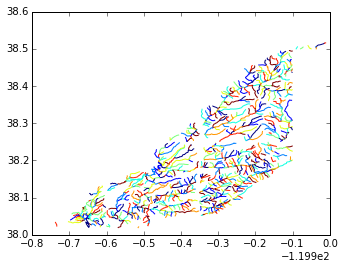

In [28]:
df[0:1000].plot()

##This next block is simply for seeing what the dataset looks like so that the next operation makes more sense##

Note: it is formatted as markdown so that it will not execute automatically. 

import xray
f = xray.open_dataset(inputNetCDF)
data = f.to_dataframe()

f.close()

data

#Open netCDF file#

In [29]:
nc = Dataset(inputNetCDF, 'r')

In [30]:
nc

<type 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format UNDEFINED):
    dimensions(sizes): Time(5832), COMID(658702)
    variables(dimensions): int32 COMID(COMID), float32 Qout(Time,COMID)
    groups: 

##Loop over netCDF file and select out entries by COMID and Qout value, write these values to a Python dictionary##

In [31]:
def eatOneTimestep(current_dt, start_dt, nc):

    com_length = len(nc.variables['Qout'])

    print com_length
    comid_index = 0
    time_index = howManySteps(current_dt, start_dt)

    foo = {}
    footime = {}  

    for comid_index in range(com_length):
        if len(nc.variables['Qout']) != len(nc.variables['COMID']):
            print "Watch out! Your Qout and COMID columns are not the same length in the netCDF file"

        print comid_index
        comidTemp = nc.variables['COMID'][comid_index]
        qoutTemp = nc.variables['Qout'][comid_index,:][time_index]
        clear_output(wait=True)
        print comidTemp
        print qoutTemp
        foo[comidTemp] = qoutTemp
        #footime[comidTemp] = current_dt
        
    return(foo)

In [30]:
for elm in yeardict:
    print yeardict[elm]

1998-03-01 00:00:00
1998-02-01 00:00:00
1998-08-01 00:00:00
1998-09-01 00:00:00
1998-04-01 00:00:00
1998-06-01 00:00:00
1998-07-01 00:00:00
1998-01-01 00:00:00
1998-05-01 00:00:00
1998-11-01 00:00:00
1998-12-01 00:00:00
1998-10-01 00:00:00


In [32]:
desiredStart

datetime.datetime(1998, 2, 1, 0, 0)

In [33]:
howManySteps(desiredStart, start_dt)

3168

In [35]:
for counter in range(0,1):
    current_dt = desiredStart + datetime.timedelta(hours=(3*counter))
    print current_dt
    foo = eatOneTimestep(current_dt, start_dt, nc)
    month2Shape(current_dt, foo, df)
    
print counter

7887992
0.00076545


KeyError: 'COMID'

In [40]:
for elm in yeardict:
    current_dt = yeardict[elm]

    foo = eatOneTimestep(current_dt, start_dt, nc)
    month2Shape(current_dt, foo, df)

7887992
2.12212e-05
Finished.


###Convert "foo" dictionary to a Pandas Series###

In [34]:
def month2Shape(current_dt, foo, df):
    foo = pd.Series(foo)
    #footime = pd.Series(footime)
    df2 = df.copy()
    df3 = df2.set_index("COMID")
    df3['Qout'] = foo
    #df3['datetime'] = footime
    df3.head()
    df3.to_file(outputShapeFile + str(current_dt) + ' output', driver = 'ESRI Shapefile');
    print "Finished."

In [189]:
foo = pd.Series(foo)

In [190]:
#footime = pd.Series(footime)

In [191]:
df2 = df.copy()

###Change index in DataFrame so that the table is indexed using the COMID###

In [192]:
df3 = df2.set_index('COMID')

###Add the "foo" series to the DataFrame as a column. It will reference the indicies of the two to make sure that its entires are in the right place###

In [193]:
df3[dataColumnName] = foo

In [184]:
#df3['test'] = footime

###Write GeoDataFrame to an ESRI Shapefile###

In [194]:
df3.to_file(outputShapeFile + str(current_dt), driver = 'ESRI Shapefile');

###As an option for writting our data to a database, we can also save it as a GeoJson: shown below###

test = df3.to_json()

test

from IPython.display import clear_output


current_dt = yeardict[Jan]

com_length = len(nc.variables['Qout'])

print com_length
comid_index = 0
time_index = howManySteps(Oct, start_dt)

foo = {}
footime = {}  
       
for comid_index in range(com_length):
    if len(nc.variables['Qout']) != len(nc.variables['COMID']):
        print "Watch out! Your Qout and COMID columns are not the same length in the netCDF file"
    
    print comid_index
    comidTemp = nc.variables['COMID'][comid_index]
    qoutTemp = nc.variables['Qout'][comid_index,:][time_index]
    clear_output(wait=True)
    print comidTemp
    print qoutTemp
    foo[comidTemp] = qoutTemp
    footime[comidTemp] = current_dt